In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline
ratings_data = pd.read_csv("/content/ratings.csv")
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
movie_names = pd.read_csv("/content/movies.csv")
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')

In [5]:
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [7]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [8]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [9]:
rating_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [10]:
rating_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [11]:
rating_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: >

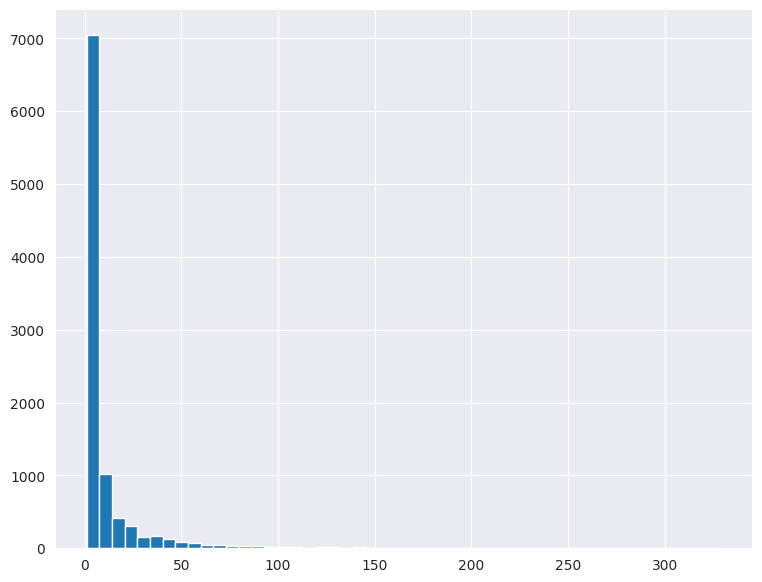

In [21]:
plt.figure(figsize=(9,7))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean_count['rating_counts'].hist(bins=50)

<Axes: >

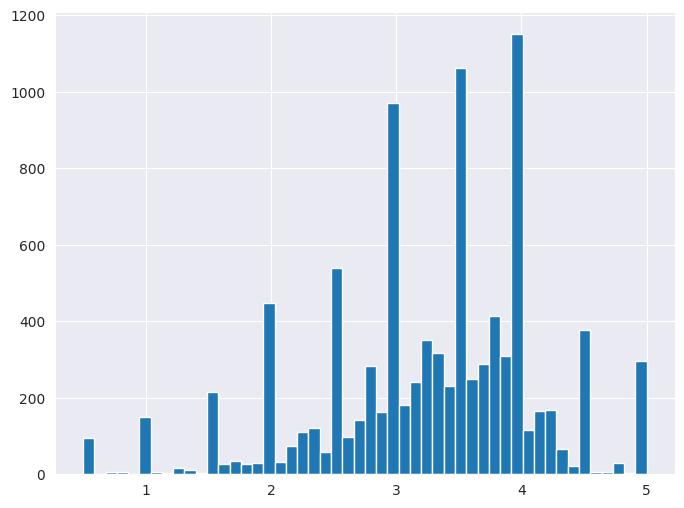

In [23]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean_count['rating'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

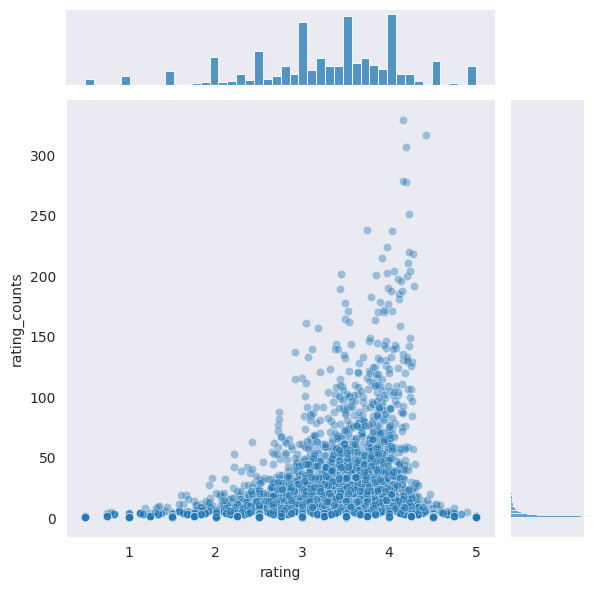

In [27]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y = 'rating_counts',data = rating_mean_count , alpha =0.4)

In [28]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

In [29]:
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
forrest_gump_ratings = user_movie_rating['Annabelle (2014)']

In [50]:
forrest_gump_ratings.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Annabelle (2014), dtype: float64

In [51]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Annabelle (2014),1.0
Brave (2012),1.0
Casablanca (1942),1.0
"Dark Knight, The (2008)",1.0
"Lord of the Rings: The Fellowship of the Ring, The (2001)",1.0


In [55]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(20)

,Correlation,rating_counts
title,,
Annabelle (2014),1.0,2
Brave (2012),1.0,30
Casablanca (1942),1.0,100
"Dark Knight, The (2008)",1.0,149
"Lord of the Rings: The Fellowship of the Ring, The (2001)",1.0,198
"Lord of the Rings: The Return of the King, The (2003)",1.0,185
"Lord of the Rings: The Two Towers, The (2002)",1.0,188


In [53]:
corr_forrest_gump = corr_forrest_gump.join(rating_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
Annabelle (2014),1.0,2
Brave (2012),1.0,30
Casablanca (1942),1.0,100
"Dark Knight, The (2008)",1.0,149
"Lord of the Rings: The Fellowship of the Ring, The (2001)",1.0,198


In [54]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head(50)

,Correlation,rating_counts
title,,
Casablanca (1942),1.0,100
"Dark Knight, The (2008)",1.0,149
"Lord of the Rings: The Fellowship of the Ring, The (2001)",1.0,198
"Lord of the Rings: The Return of the King, The (2003)",1.0,185
"Lord of the Rings: The Two Towers, The (2002)",1.0,188
